In [1]:
import subprocess
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = 'Arial'
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

In [7]:
%%bash
cd ${HOME}/CHMsInOtherContexts/CellStateTransition/CHMOrganization/Universal_specific/Features
mkdir -p Length
cd Length
echo -e "xValue\tyValue\tgroup" > universal_specific_CHMs_length.txt
for group in Universal EarlyEmbryoSpecific PGCSpecific SpermSpecific RetinalSpecific HeartSpecific LiverSpecific
do
    awk -v XVALUE=${group} 'BEGIN{FS=OFS="\t"}{print XVALUE, $3-$2, "Length";}' ${HOME}/CHMsInOtherContexts/CellStateTransition/CHMOrganization/Universal_specific/${group}.CHM.bed >> universal_specific_CHMs_length.txt
done # for group end

In [9]:
os.chdir('/mnt/Storage/home/wangyiman/CHMsInOtherContexts/CellStateTransition/CHMOrganization/Universal_specific/Features/Length')
uni_spe_len = pd.read_csv('universal_specific_CHMs_length.txt', sep = "\t", header = 0)
uni_spe_len

,xValue,yValue,group
0,Universal,3700,Length
1,Universal,800,Length
2,Universal,750,Length
3,Universal,1250,Length
4,Universal,7300,Length
...,...,...,...
9652,LiverSpecific,600,Length
9653,LiverSpecific,800,Length
9654,LiverSpecific,600,Length
9655,LiverSpecific,600,Length


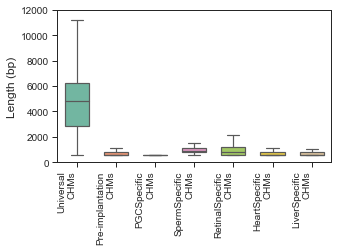

In [52]:
with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 10,
                             'ytick.labelsize': 10,
                             'legend.fontsize': 10
                         }):
    fig, ax = plt.subplots(figsize = (6.4 * .75, 4.8 *.75), tight_layout = True)
    sns.boxplot(
        data = uni_spe_len,
        x = 'xValue',
        y = 'yValue',
        ax = ax,
        showfliers = False,
        width = 0.618,
        palette = 'Set2'
    )
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels([f'{x.get_text()}\nCHMs' if x.get_text() != 'EarlyEmbryoSpecific' else 'Pre-implantation\nCHMs' for x in ax.get_xticklabels()], rotation = 90, ha = 'right', va = 'top')
    ax.set_xlabel("")
    ax.set_ylabel('Length (bp)')
    ax.set_ylim(0,12000)
    fig.savefig('/mnt/Storage/home/wangyiman/CHMsInOtherContexts/figures/make8_box_universal_specific_length.pdf', transparent = True)
    

In [27]:
[x.get_text() for x in ax.get_xticklabels()]

['Universal',
 'EarlyEmbryoSpecific',
 'PGCSpecific',
 'SpermSpecific',
 'RetinalSpecific',
 'HeartSpecific',
 'LiverSpecific']